# Acquisition Analytics Assignment

## Problem Statement 
- ### Predict the probability of a response from each prospect and target the ones most likely to respond to the next telemarketing campaign.

## Business Objective 
- ### Achieve 80% of total responders at the minimum possible cost. Calculate the X in the top X%, i.e., how many prospects should be called to meet the business objective?

## Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

## Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

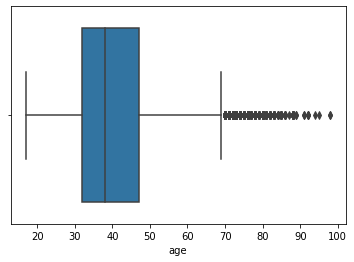

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

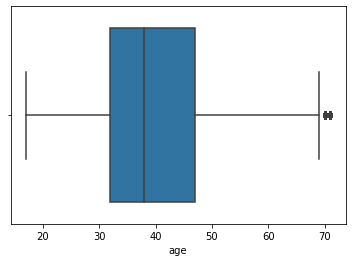

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


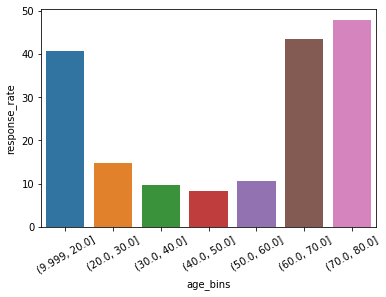

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


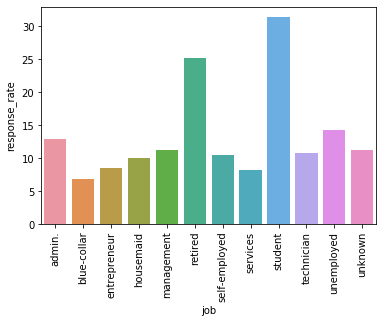

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is reiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


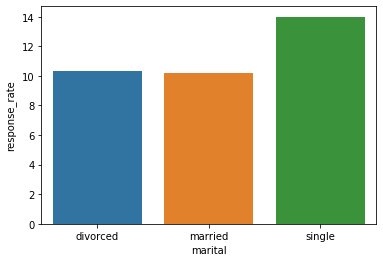

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


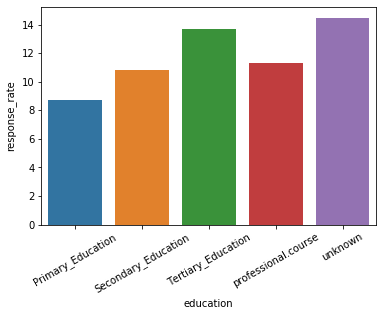

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


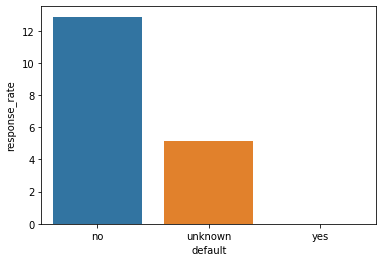

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


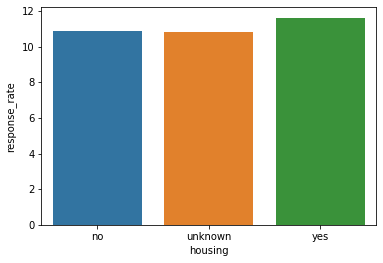

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


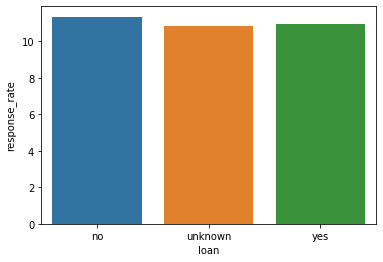

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


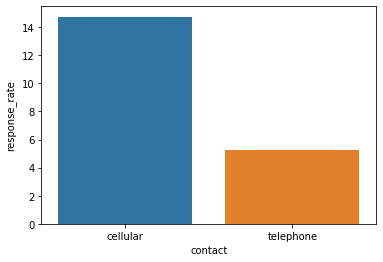

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly more likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


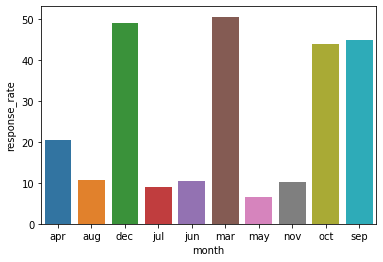

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


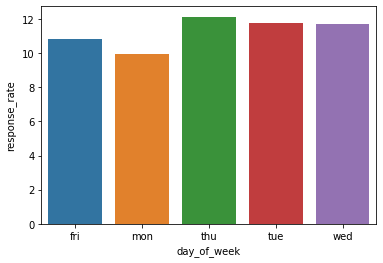

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

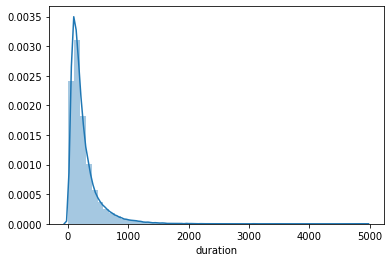

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

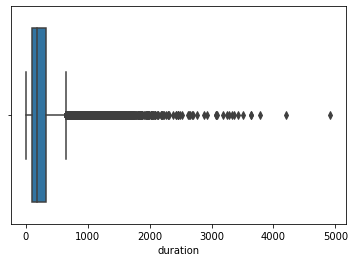

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] = 1271

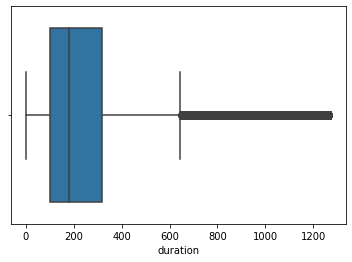

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

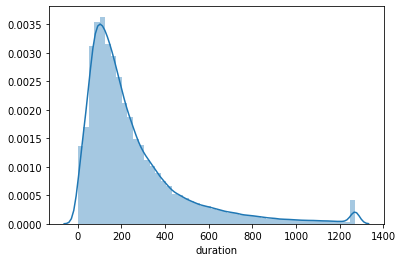

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

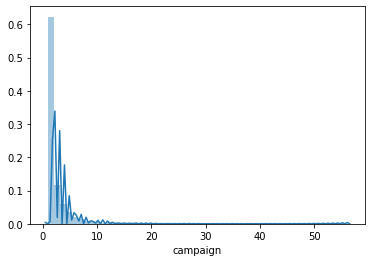

In [96]:
sns.distplot(loan['campaign'])
plt.show()

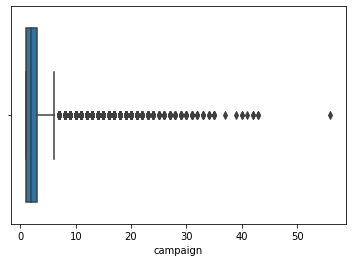

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merge all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

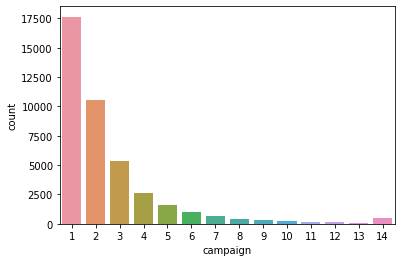

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


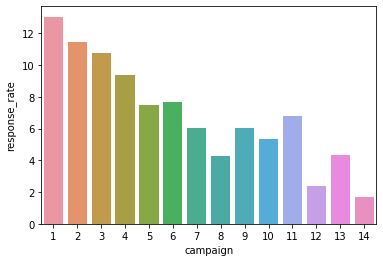

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was not previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


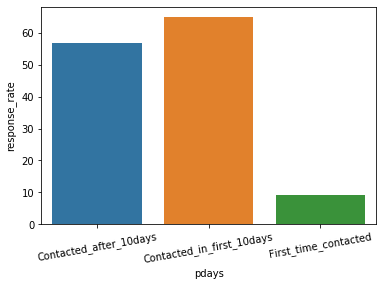

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [118]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


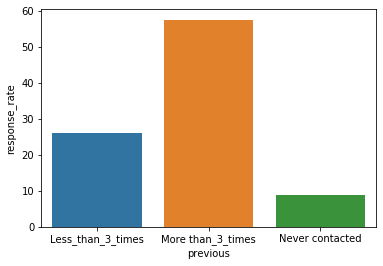

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

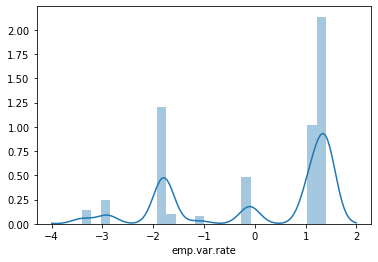

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


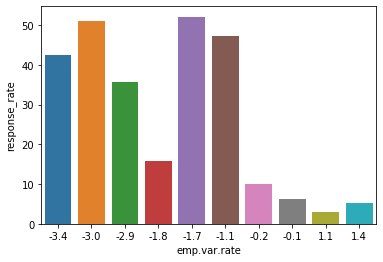

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

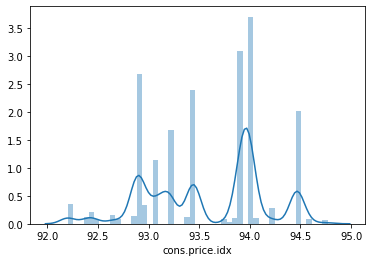

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

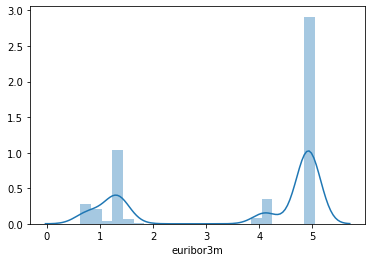

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

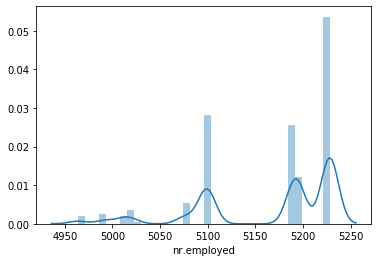

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

## Data Preparation

Once Exploratory Data Analysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column age_bins we had created for the purpose of data visualisation

loan.drop(columns = 'age_bins', inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [147]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [148]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [149]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [150]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [151]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [152]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [153]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [154]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [155]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [156]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [157]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [158]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [159]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [160]:
# add column Prospect_ID id

loan['prospect_id'] = loan.index

In [161]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success,prospect_id
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,1
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,2
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,3
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,1,1,0,4


## Test and train split for model building

In [162]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split

In [163]:
# Putting feature variable to X 
X = loan.drop(['response','duration','prospect_id'],axis=1)

# Putting response variable to y
y = loan['response']

In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [165]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [166]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [167]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [168]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [169]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [170]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [171]:
# Standardisation continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [172]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [173]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [174]:
#X_test.set_index('Prospect_ID')
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [175]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


In [176]:
# check class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

In [177]:
X_train.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_nonexistent', 'poutcome_success',
       'age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       

## Modelling

Now that the data preparation step is complete, we will jump straight into modelling.

#### Logistic Regression

In [178]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [179]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [180]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Fri, 21 Aug 2020   Deviance:                       15867.
Time:                        09:35:52   Pearson chi2:                 2.92e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0

### PCA

In [181]:
# import all libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [182]:
# perform pca
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [183]:
# list of number of pca components with percentage variance
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      32.80
1      43.59
2      52.43
3      60.59
4      66.34
5      69.65
6      72.24
7      74.59
8      76.82
9      78.77
10     80.65
11     82.50
12     84.31
13     86.07
14     87.70
15     89.18
16     90.44
17     91.58
18     92.63
19     93.37
20     94.08
21     94.67
22     95.19
23     95.70
24     96.16
25     96.57
26     96.96
27     97.36
28     97.70
29     98.01
30     98.30
31     98.57
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64


In [184]:
# pca components
pca.components_

array([[-1.36741320e-02, -6.94924264e-04, -3.48588045e-03, ...,
        -1.29824382e-01, -5.12767548e-01, -4.76850776e-01],
       [-2.90476003e-02,  1.54950448e-03,  1.15320221e-02, ...,
         6.01471530e-01,  2.88590240e-02, -7.01185412e-02],
       [ 2.16271248e-02,  5.02101532e-03,  6.69433978e-03, ...,
        -3.53330273e-01, -8.42096673e-02, -2.54903663e-02],
       ...,
       [-5.47622511e-05,  9.54194521e-06, -4.55003380e-06, ...,
         3.03912323e-05, -1.52905712e-04,  1.08186626e-04],
       [-1.68070938e-17,  2.86797357e-16,  8.21543460e-17, ...,
        -2.56753741e-17,  1.00378837e-17,  9.49643827e-17],
       [ 0.00000000e+00,  2.67682307e-16, -1.98547144e-16, ...,
        -1.03861304e-16,  5.09020267e-16, -1.01400175e-17]])

In [185]:
# Data frame with pc1 and pc2
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.013674,-0.029048,job_blue-collar
1,-0.000695,0.001550,job_entrepreneur
2,-0.003486,0.011532,job_housemaid
3,0.001498,0.014450,job_management
4,0.009701,0.066912,job_retired


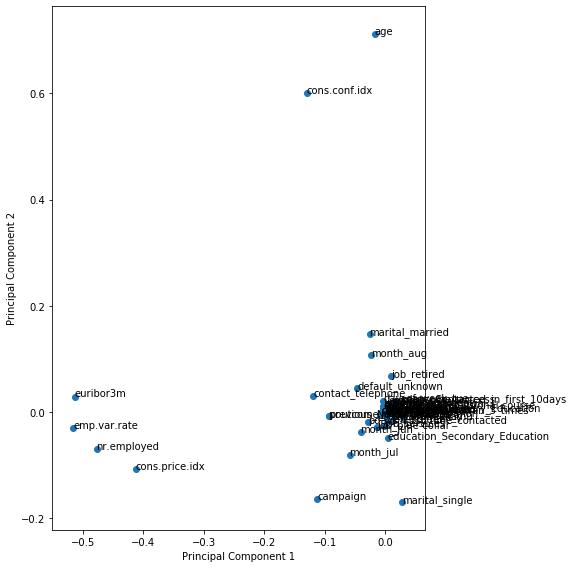

In [186]:
# Plot original features on the first 2 principal components as axes
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

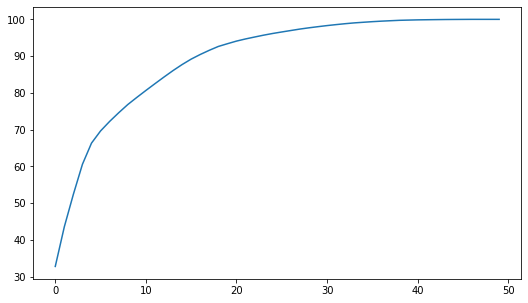

In [187]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [188]:
# create pipeline with pca components equal to 16
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [189]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8158926155873886

In [190]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

In [191]:
# make prediction on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9151 1824]
 [ 535  847]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [192]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [193]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [16, 17, 18, 19, 20]},
             scoring='roc_auc')

In [194]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7851185202440479
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 16}


In [195]:
# make prediction on test data set with best hyperparameters
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[9150 1825]
 [ 535  847]]
Sensitivity: 	0.61
Specificity: 	0.83
AUC:    	 0.78


In [196]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89     10975
           1       0.32      0.61      0.42      1382

    accuracy                           0.81     12357
   macro avg       0.63      0.72      0.65     12357
weighted avg       0.87      0.81      0.83     12357



In [197]:
y_test.head()

33148    0
27585    0
15722    0
40349    1
2576     0
Name: response, dtype: int64

In [198]:
y_pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [199]:
y_pred_prob[:10]

array([0.50206309, 0.3326571 , 0.2790498 , 0.93126896, 0.20190509,
       0.47655071, 0.34862013, 0.1740671 , 0.35485849, 0.30748139])

##### Creating a dataframe with the actual response flag and the predicted probabilities

In [200]:
y_test_pred_final = pd.DataFrame({'actual_response':y_test.values, 'probability':y_pred_prob})
y_test_pred_final['ProspectID'] = y_test.index
y_test_pred_final.head()

,actual_response,probability,ProspectID
0,0,0.502063,33148
1,0,0.332657,27585
2,0,0.279050,15722
3,1,0.931269,40349
4,0,0.201905,2576


##### Creating new column 'predicted' with 1 if probability > 0.5 else 0

In [201]:
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,actual_response,probability,ProspectID,predicted
0,0,0.502063,33148,1
1,0,0.332657,27585,0
2,0,0.279050,15722,0
3,1,0.931269,40349,1
4,0,0.201905,2576,0


In [202]:
from sklearn import metrics

In [203]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.actual_response, y_test_pred_final.predicted )
print(confusion)

[[9150 1825]
 [ 535  847]]


In [204]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.actual_response, y_test_pred_final.predicted))

0.8090151331229263


#### Let's calculate some more metrics beyond simply accuracy

In [205]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [206]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6128798842257598

In [207]:
# Let us calculate specificity
TN / float(TN+FP)

0.8337129840546698

In [208]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1662870159453303


In [209]:
# positive predictive value 
print (TP / float(TP+FP))

0.31699101796407186


In [210]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9447599380485286


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [211]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

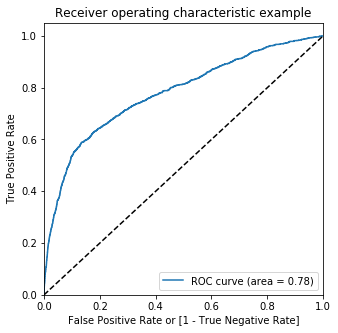

In [212]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.actual_response, y_test_pred_final.probability, drop_intermediate = False )
draw_roc(y_test_pred_final.actual_response, y_test_pred_final.probability)

#### Finding Optimal Cutoff Point

In [213]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.probability.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,actual_response,probability,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.502063,33148,1,1,1,1,1,1,1,0,0,0,0
1,0,0.332657,27585,0,1,1,1,1,0,0,0,0,0,0
2,0,0.279050,15722,0,1,1,1,0,0,0,0,0,0,0
3,1,0.931269,40349,1,1,1,1,1,1,1,1,1,1,1
4,0,0.201905,2576,0,1,1,1,0,0,0,0,0,0,0


In [214]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.actual_response, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.111839  1.000000  0.000000
0.1   0.1  0.111920  1.000000  0.000091
0.2   0.2  0.213320  0.979016  0.116902
0.3   0.3  0.464271  0.860347  0.414396
0.4   0.4  0.723315  0.699711  0.726287
0.5   0.5  0.809015  0.612880  0.833713
0.6   0.6  0.841790  0.570188  0.875991
0.7   0.7  0.870195  0.481910  0.919089
0.8   0.8  0.881282  0.397250  0.942232
0.9   0.9  0.896334  0.187410  0.985604


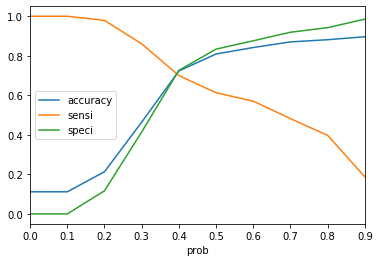

In [215]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Let's make prediction using cut off point equal to 0.4 on test data set

In [216]:
# let's make prediction using cut off point equal to 0.4
y_test_pred_final['final_predicted'] = y_test_pred_final.probability.map( lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

,actual_response,probability,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.502063,33148,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.332657,27585,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.279050,15722,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.931269,40349,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.201905,2576,0,1,1,1,0,0,0,0,0,0,0,0


In [217]:
# Let's check the overall accuracy with cut off point equal to 0.4
metrics.accuracy_score(y_test_pred_final.actual_response, y_test_pred_final.final_predicted)

0.7233147204013919

In [218]:
# let's check confusion matrix with cut off point equal to 0.4
confusion2 = metrics.confusion_matrix(y_test_pred_final.actual_response, y_test_pred_final.final_predicted )
confusion2

array([[7971, 3004],
       [ 415,  967]], dtype=int64)

In [219]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6997105643994211

In [221]:
# Let us calculate specificity
TN / float(TN+FP)

0.7262870159453303

In [222]:
# Calculate false postive rate - 
#predicting positive reponse when customer have not responded positive
print(FP/ float(TN+FP))

0.2737129840546697


In [223]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2435154872828003


In [224]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9505127593608395


#### Precision and Recall

In [225]:
from sklearn.metrics import precision_score, recall_score

In [226]:
# Precision
precision_score(y_test_pred_final.actual_response, y_test_pred_final.final_predicted)

0.2435154872828003

In [227]:
# Recall
recall_score(y_test_pred_final.actual_response, y_test_pred_final.final_predicted)

0.6997105643994211

#### Precision and recall tradeoff

In [228]:
from sklearn.metrics import precision_recall_curve

In [229]:
y_test_pred_final.actual_response, y_test_pred_final.final_predicted

(0        0
 1        0
 2        0
 3        1
 4        0
 5        1
 6        0
 7        0
 8        0
 9        0
 10       1
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
         ..
 12327    0
 12328    0
 12329    0
 12330    0
 12331    1
 12332    0
 12333    0
 12334    0
 12335    0
 12336    0
 12337    0
 12338    0
 12339    0
 12340    0
 12341    0
 12342    0
 12343    0
 12344    0
 12345    0
 12346    0
 12347    0
 12348    0
 12349    0
 12350    0
 12351    0
 12352    0
 12353    0
 12354    0
 12355    1
 12356    0
 Name: actual_response, Length: 12357, dtype: int64, 0        1
 1        0
 2        0
 3        1
 4        0
 5        1
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       1
 13       0
 14       0
 15       0
 16       0
 17       0


In [230]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.actual_response, y_test_pred_final.probability)

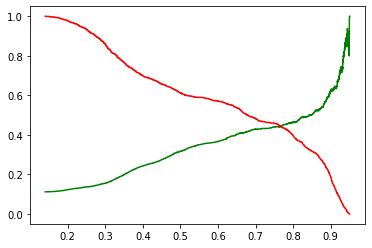

In [231]:
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Results based on test data set 

### 1) Create a data frame with the variables prospect ID, actual response, predicted response, predicted probability of response, duration of the call in seconds and cost of the call

In [233]:
# join duration column from loan data set to predicted values test data set
y_test_pred_final = y_test_pred_final.join(loan['duration'])

In [234]:
# let's see head
y_test_pred_final.head()

,actual_response,probability,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,duration
0,0,0.502063,33148,1,1,1,1,1,1,1,0,0,0,0,1,261
1,0,0.332657,27585,0,1,1,1,1,0,0,0,0,0,0,0,149
2,0,0.279050,15722,0,1,1,1,0,0,0,0,0,0,0,0,226
3,1,0.931269,40349,1,1,1,1,1,1,1,1,1,1,1,1,151
4,0,0.201905,2576,0,1,1,1,0,0,0,0,0,0,0,0,307


In [236]:
# Remove unnecessary columns 0.0 to 0.9, and predicted column which we used for standard 0.5 probability
y_test_pred_final.drop(['predicted', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], axis=1, inplace=True)

In [238]:
# Rename final_predicted colun to predicted_response
y_test_pred_final.rename(columns = {'final_predicted':'predicted_response'}, inplace = True)
y_test_pred_final.head()

,actual_response,probability,ProspectID,predicted_response,duration
0,0,0.502063,33148,1,261
1,0,0.332657,27585,0,149
2,0,0.279050,15722,0,226
3,1,0.931269,40349,1,151
4,0,0.201905,2576,0,307


#### create new column for cost of the call

In [239]:
y_test_pred_final['cost_of_call'] = y_test_pred_final['duration'].apply(
                                lambda x : x/60 if x % 60 == 0 else (x//60 + 1))

In [240]:
y_test_pred_final.head()

,actual_response,probability,ProspectID,predicted_response,duration,cost_of_call
0,0,0.502063,33148,1,261,5.0
1,0,0.332657,27585,0,149,3.0
2,0,0.279050,15722,0,226,4.0
3,1,0.931269,40349,1,151,3.0
4,0,0.201905,2576,0,307,6.0


### 2)  Find the number of top X% prospects you should target to meet the business objective

In [241]:
# create decile data frame from y_test_pred_final
decile_df = pd.DataFrame(y_test_pred_final)
decile_df.head()

,actual_response,probability,ProspectID,predicted_response,duration,cost_of_call
0,0,0.502063,33148,1,261,5.0
1,0,0.332657,27585,0,149,3.0
2,0,0.279050,15722,0,226,4.0
3,1,0.931269,40349,1,151,3.0
4,0,0.201905,2576,0,307,6.0


In [243]:
# create decile column with decile values
decile_df['decile'] = pd.qcut(decile_df['probability'], 10, labels=np.arange(10, 0, -1))
decile_df.head()

,actual_response,probability,ProspectID,predicted_response,duration,cost_of_call,decile
0,0,0.502063,33148,1,261,5.0,3
1,0,0.332657,27585,0,149,3.0,5
2,0,0.279050,15722,0,226,4.0,7
3,1,0.931269,40349,1,151,3.0,1
4,0,0.201905,2576,0,307,6.0,9


In [244]:
# group by decile dataframe to create lift dataframe
lift_df = decile_df.groupby('decile')['probability'].count().reset_index()
lift_df.head()

,decile,probability
0,10,1237
1,9,1235
2,8,1235
3,7,1236
4,6,1236


In [245]:
# rename column probability to total
lift_df.rename({'probability':'total'}, axis=1, inplace=True)
lift_df.head()

,decile,total
0,10,1237
1,9,1235
2,8,1235
3,7,1236
4,6,1236


In [246]:
# calculate response count for each decile
lift_df_pred = decile_df[decile_df['actual_response']==1].groupby('decile')['actual_response'].count().reset_index()
lift_df_pred.head()

,decile,actual_response
0,10,29
1,9,43
2,8,65
3,7,75
4,6,62


In [247]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [248]:
# merge lift_df and lift_df_pred
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final.head()

,decile,total,actual_response
0,10,1237,29
1,9,1235,43
2,8,1235,65
3,7,1236,75
4,6,1236,62


In [249]:
# sort the data 
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final.head()

,decile,total,actual_response
9,1,1236,571
8,2,1236,255
7,3,1235,118
6,4,1236,91
5,5,1235,73


In [250]:
# create cummulative response column
lift_df_final['cummulative_response'] = lift_df_final['actual_response'].cumsum()
lift_df_final.head()

,decile,total,actual_response,cummulative_response
9,1,1236,571,571
8,2,1236,255,826
7,3,1235,118,944
6,4,1236,91,1035
5,5,1235,73,1108


In [251]:
# create gain column
lift_df_final['gain'] = 100*(lift_df_final['cummulative_response']/sum(lift_df_final['actual_response']))
lift_df_final.head()

,decile,total,actual_response,cummulative_response,gain
9,1,1236,571,571,41.316932
8,2,1236,255,826,59.768452
7,3,1235,118,944,68.306802
6,4,1236,91,1035,74.891462
5,5,1235,73,1108,80.173661


In [252]:
# create cummulative lift column
lift_df_final['cummulative_lift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [254]:
# check data det
lift_df_final

,decile,total,actual_response,cummulative_response,gain,cummulative_lift
9,1,1236,571,571,41.316932,4.131693
8,2,1236,255,826,59.768452,2.988423
7,3,1235,118,944,68.306802,2.276893
6,4,1236,91,1035,74.891462,1.872287
5,5,1235,73,1108,80.173661,1.603473
4,6,1236,62,1170,84.659913,1.410999
3,7,1236,75,1245,90.086831,1.286955
2,8,1235,65,1310,94.790159,1.184877
1,9,1235,43,1353,97.901592,1.087795
0,10,1237,29,1382,100.000000,1.000000


#### Question: Find the number of top X% prospects you should target to meet the business objective

- #### Answer: In our problem statement target is to get 80 percent conversion. And from above decile chart we can see that 80% target can be acheived by targeting only 50% people. So here X will be 5 and X% will be 50%.

#### This can be used in cost optimization and depending on the cost per call, we can determine, how many people should be part of the tele marketing campaign.

#### Report the average call duration for targeting the top X% prospects to the CMO

In [255]:
# Let's see mean for call duration in each decile
average_call_duration = decile_df.groupby('decile')['duration'].mean().reset_index()
average_call_duration = average_call_duration.sort_values(['decile'], ascending=False)

In [256]:
# Let's calculate cummulative mean for each decile
average_call_duration['cum_mean_dur'] = average_call_duration['duration'].cumsum()
average_call_duration

,decile,duration,cum_mean_dur
9,1,264.487864,264.487864
8,2,251.001618,515.489482
7,3,255.059109,770.548592
6,4,242.976537,1013.525129
5,5,250.170040,1263.695169
4,6,252.016990,1515.712160
3,7,245.768608,1761.480768
2,8,256.298785,2017.779553
1,9,237.555466,2255.335019
0,10,260.558610,2515.893628


In [257]:
# Let's see sum for call duration in each decile
sum_call_duration = decile_df.groupby('decile')['duration'].sum().reset_index()
sum_call_duration = sum_call_duration.sort_values(['decile'], ascending=False)

In [258]:
# Let's calculate cummulative sum for each decile
sum_call_duration['cum_sum_dur'] = sum_call_duration['duration'].cumsum()
sum_call_duration

,decile,duration,cum_sum_dur
9,1,326907,326907
8,2,310238,637145
7,3,314998,952143
6,4,300319,1252462
5,5,308960,1561422
4,6,311493,1872915
3,7,303770,2176685
2,8,316529,2493214
1,9,293381,2786595
0,10,322311,3108906


In [259]:
# check number of prospects in test data set
X_test.shape

(12357, 50)

### Create a lift chart

Text(0, 0.5, 'gain')

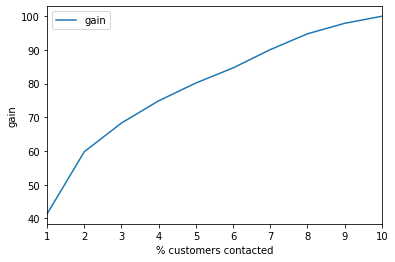

In [260]:
# decile and gain chart
lift_df_final.plot.line(x='decile', y=['gain'])
plt.xlabel('% customers contacted')
plt.ylabel('gain')

Text(0, 0.5, 'lift')

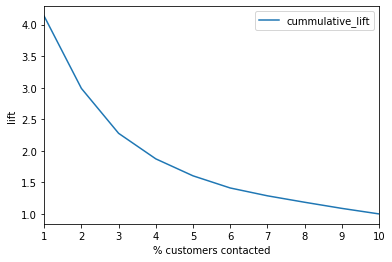

In [262]:
# decile and lift chart
lift_df_final.plot.line(x='decile', y=['cummulative_lift'])
plt.xlabel('% customers contacted')
plt.ylabel('lift')

### Determine the cost of acquisition

##### As per the formula given above, the cost will be equal to
cost = 1* (50 % of 12357) = 6178.5

##### And if we consider average duration of call and cost of the call based on data available, then acquisition cost will be equal to 

cost = (duration of call) * (cost of call) * (number of contacts made)

# Conclusion